In [75]:
import numpy as np
import matplotlib.pyplot as plt

In [76]:
alpha = 4e-4
tottime = 30 
L = 1
N = 1000               
dx = L/N 
dt = 1e-3
v = 0.05
nt = int(tottime/dt)
x = np.linspace(0,L,N+1)

In [77]:
a = alpha * dt / dx**2
b = v * dt / dx
stab_par = (2 * a) + b
print(f"Stability parameter: {stab_par}")
assert stab_par <= 1, "stability parameter must be ≤ 1"


Stability parameter: 0.8500000000000002


In [78]:
sigma = 0.03
T = np.exp(-((x - 0.5)**2) / (2*sigma**2))
T_new = np.zeros_like(T)

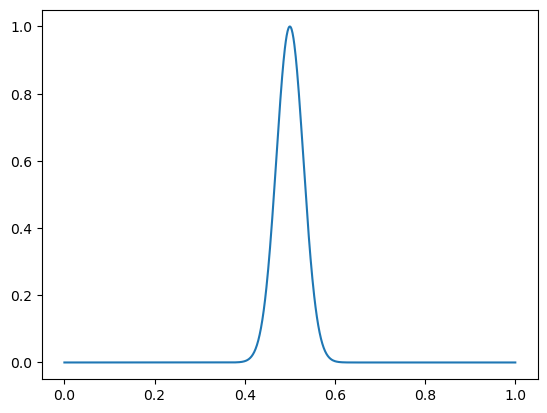

In [79]:
plt.plot(x, T, label='t=0')

In [80]:
all_values = np.zeros((nt+1,N+1))
all_values[0] = T

In [81]:
coeff1 = 1-(2*a)-b
coeff2 = a
coeff3 = a + b

In [82]:
T_rep = T.copy()
T_rep = np.append(T_rep, T[0])
T_new_rep = np.zeros_like(T_rep)

In [83]:
for n in range(1,nt+1):
    for i in range(1,N+1):
        T_new_rep[i] = coeff1*T_rep[i] + coeff2*T_rep[i+1] + coeff3*T_rep[i-1]
    T_rep[:] = T_new_rep[:]
    T_rep[0] = T_rep[N]
    T_rep[N+1] = T_rep[1] 
    all_values[n] = T_rep[:-1]

In [84]:
def function1(t):
    index = int(round(t/dt))
    assert 0<= index <= nt, "Index out of bounds"
    return all_values[index]

In [85]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, L)
ax.set_ylim(0, 1.1)
ax.set_xlabel("x")
ax.set_ylabel("T(x,t)")
ax.set_title("Heat Diffusion Over Time")
ax.grid()

time_text = ax.text(0.75, 1.02, '', transform=ax.transAxes)

times_to_show = np.arange(0, tottime+1) 
frames = [int(t / dt) for t in times_to_show]

frames = [f for f in frames if f <= nt]

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def update(frame):
    y = all_values[frame]
    line.set_data(x, y)
    t_sec = round(frame * dt, 2)
    time_text.set_text(f't = {t_sec} s')
    return line, time_text

ani = FuncAnimation(fig, update, frames=frames, init_func=init,
                    blit=False, repeat=True, interval=200)

plt.close(fig)
from IPython.display import HTML
HTML(ani.to_jshtml())

